Using the text embedding model, write a python jupyter notebook called cv-hotword-similarity-5b.ipynb to find similar phrases to the 3 hot words in task 5a. Using cv-valid-dev.csv, write the Boolean (true for a record containing similar phrases to the hot words; false for a record that is not similar) into a new column called similarity. Save this updated file in this folder.

In [1]:
# !pip install sentence-transformers==2.2.2 InstructorEmbedding

In [7]:
# from InstructorEmbedding import INSTRUCTOR

# model = INSTRUCTOR('hkunlp/instructor-large')
# sentence = "3D ActionSLAM: wearable person tracking in multi-floor environments"
# instruction = "Represent the Science title:"
# embeddings = model.encode([[instruction,sentence]])
# print(embeddings)

Note: Encountered errors while trying to call the Instructor according to HF model card;

- Attempted but failed on both Colab and local device, where local device unable to install due to unknown permission errors.

- Also HF thread showing potential errors with the relevant libaries no longer maintained (https://huggingface.co/hkunlp/instructor-large/discussions/23)
- PS. HF thread for model card containing many user errors but mostly still unresolved (https://huggingface.co/hkunlp/instructor-large/discussions)

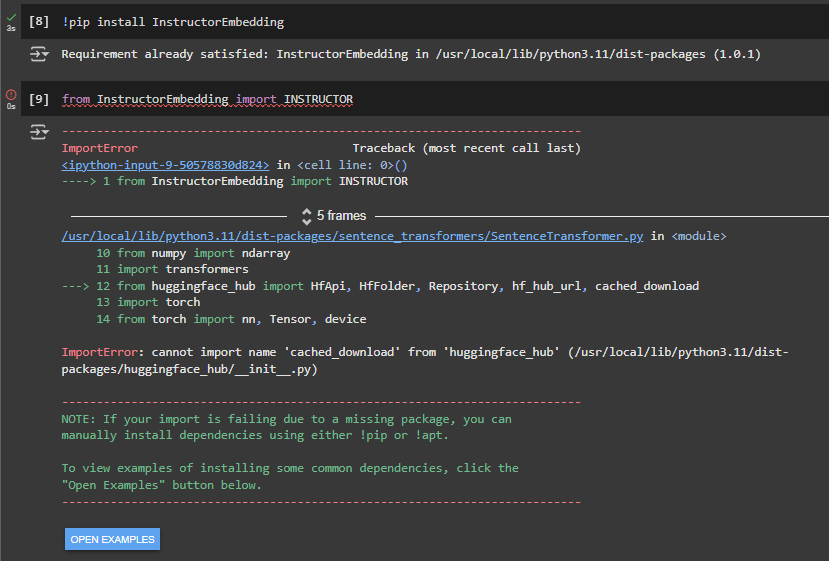
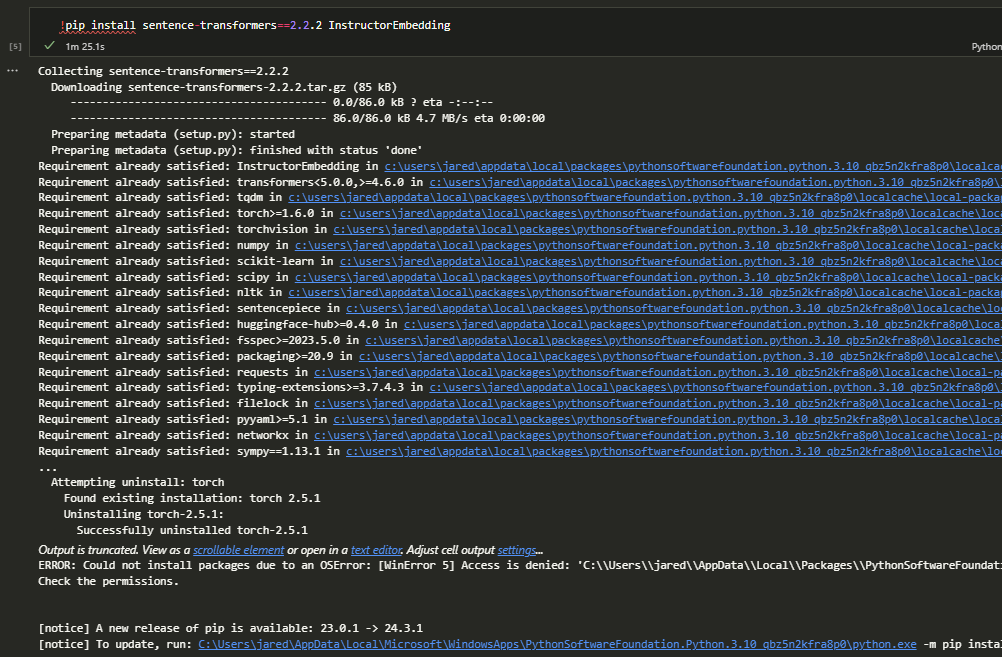

Next viable alternative: Calling the model as if it is a generic HF model, and following similar syntax to get desired output.

In [14]:
# # Load model directly
# from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("hkunlp/instructor-large")
# model = AutoModel.from_pretrained("hkunlp/instructor-large")

In [ ]:
# from sentence_transformers import SentenceTransformer
# import torch

# # Define the prompt
# sentence = "3D ActionSLAM: wearable person tracking in multi-floor environments"
# instruction = "Represent the Science title:"

# prompt = model.encode([[instruction,sentence]])
# inputs = tokenizer(prompt, return_tensors="pt")

# with torch.no_grad():
#   outputs = model(**inputs)

# # Get the output vector
# output_vector = outputs.pooler_output.squeeze(0) 
# output_vector

In [ ]:
# input_texts = [
#     'query: how much protein should a female eat',
#     "passage: As a general guideline, the CDC's average requirement of protein for women ages 19 to 70 is 46 grams per day. But, as you can see from this chart, you'll need to increase that if you're expecting or training for a marathon. Check out the chart below to see how much protein you should be eating each day.",
# ]

# embeddings = model.encode(input_texts, normalize_embeddings=True)
# inputs = tokenizer(embeddings, return_tensors="pt")

# with torch.no_grad():
#   outputs = model(**inputs)

# # Get the output vector
# output_vector = outputs.pooler_output.squeeze(0) 
# output_vector

Still obtained error when attempting above code :(

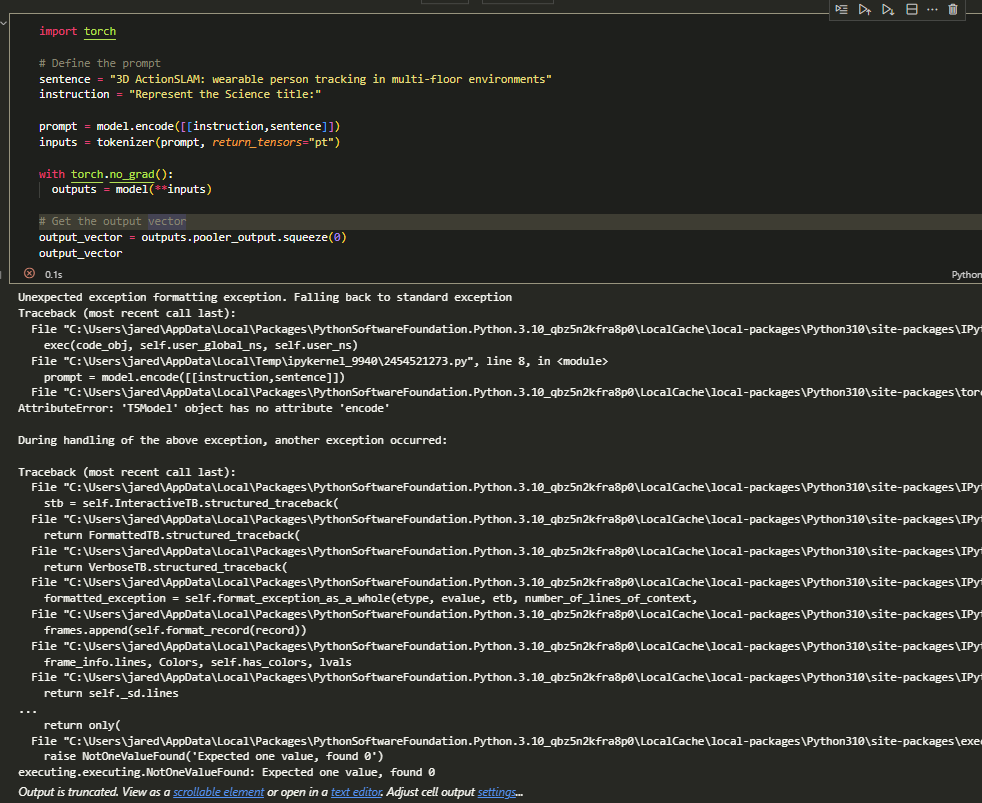
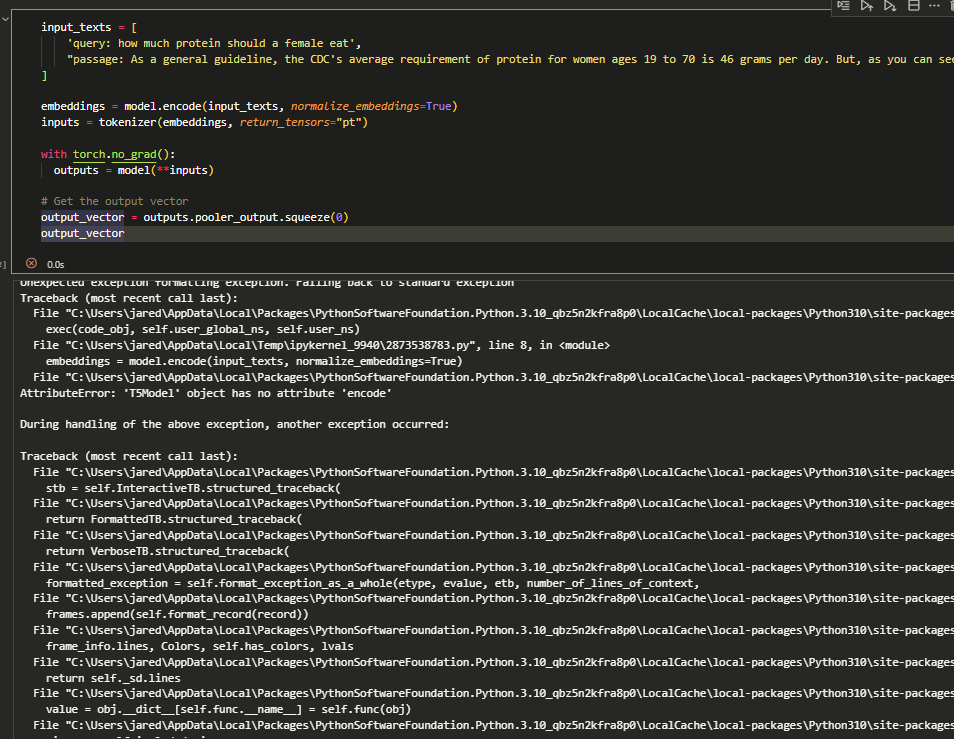

Given the technical issues, for interests of the task, another alternative is thus proposed.

With the aim to generate similar phrases to the given context aka hotwords, normal text embedding models face big limitations as their goal is to find text similarity across given queries. Whereas, as the aim is for the model to generate new potential phrases, larger GenAI models are then tapped on. 

Google BERT is then selected since it is a powerful general-purpose language model. We then tap on the unmasking feature to generate similar words to the given hotwords, and rearrange the order to increase the vocabulary size.

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="google-bert/bert-base-uncased")

C:\Users\jared\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")
BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after 

In [3]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [4]:
query1 = "be careful, destroy, [MASK], stranger"

outputs1 = unmasker(query1)
outputs1

[{'score': 0.5255398750305176,
  'token': 7985,
  'token_str': 'stranger',
  'sequence': 'be careful, destroy, stranger, stranger'},
 {'score': 0.05647696554660797,
  'token': 3102,
  'token_str': 'kill',
  'sequence': 'be careful, destroy, kill, stranger'},
 {'score': 0.05434579774737358,
  'token': 6033,
  'token_str': 'destroy',
  'sequence': 'be careful, destroy, destroy, stranger'},
 {'score': 0.014882848598062992,
  'token': 4047,
  'token_str': 'protect',
  'sequence': 'be careful, destroy, protect, stranger'},
 {'score': 0.01001056656241417,
  'token': 5473,
  'token_str': 'danger',
  'sequence': 'be careful, destroy, danger, stranger'}]

In [5]:
query2 = "be careful, [MASK], destroy, stranger"

outputs2 = unmasker(query2)
outputs2

[{'score': 0.34079205989837646,
  'token': 6033,
  'token_str': 'destroy',
  'sequence': 'be careful, destroy, destroy, stranger'},
 {'score': 0.23703792691230774,
  'token': 3102,
  'token_str': 'kill',
  'sequence': 'be careful, kill, destroy, stranger'},
 {'score': 0.11281318217515945,
  'token': 4047,
  'token_str': 'protect',
  'sequence': 'be careful, protect, destroy, stranger'},
 {'score': 0.01623479090631008,
  'token': 2954,
  'token_str': 'fight',
  'sequence': 'be careful, fight, destroy, stranger'},
 {'score': 0.015501896850764751,
  'token': 2886,
  'token_str': 'attack',
  'sequence': 'be careful, attack, destroy, stranger'}]

In [6]:
query3 = "[MASK], be careful, destroy, stranger"

outputs3 = unmasker(query3)
outputs3

[{'score': 0.2327604442834854,
  'token': 6033,
  'token_str': 'destroy',
  'sequence': 'destroy, be careful, destroy, stranger'},
 {'score': 0.1226799488067627,
  'token': 3102,
  'token_str': 'kill',
  'sequence': 'kill, be careful, destroy, stranger'},
 {'score': 0.05636932700872421,
  'token': 3531,
  'token_str': 'please',
  'sequence': 'please, be careful, destroy, stranger'},
 {'score': 0.036246176809072495,
  'token': 4047,
  'token_str': 'protect',
  'sequence': 'protect, be careful, destroy, stranger'},
 {'score': 0.031719889491796494,
  'token': 2021,
  'token_str': 'but',
  'sequence': 'but, be careful, destroy, stranger'}]

In [7]:
outputs = []
outputs.extend([prediction['token_str'] for prediction in outputs1])
outputs.extend([prediction['token_str'] for prediction in outputs2])
outputs.extend([prediction['token_str'] for prediction in outputs3])

outputs

['stranger',
 'kill',
 'destroy',
 'protect',
 'danger',
 'destroy',
 'kill',
 'protect',
 'fight',
 'attack',
 'destroy',
 'kill',
 'please',
 'protect',
 'but']

In [8]:
PATH = 'train_results_5a.csv'

In [18]:
import pandas as pd

results_df = pd.read_csv(PATH) 
results_df['pred_str_lowercase'] = results_df['pred_str'].str.lower()
results_df

,Unnamed: 0,filename,text,pred_str,pred_str_lowercase
0,0,cv-valid-dev/sample-000000.mp3,BE CAREFUL WITH YOUR PROGNOSTICATIONS SAID THE...,BE CAREFUL WITH YOUR PROPMASTIGATIONS SAID THE...,be careful with your propmastigations said the...
1,1,cv-valid-dev/sample-000001.mp3,THEN WHY SHOULD THEY BE SURPRISED WHEN THEY SE...,THEN WHY SHOULD THEY BE SURPRISED WHEN THI SEE...,then why should they be surprised when thi see...
2,2,cv-valid-dev/sample-000002.mp3,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,a young arab also loaded down with baggage ent...
3,3,cv-valid-dev/sample-000003.mp3,I THOUGHT THAT EVERYTHING I OWNED WOULD BE DES...,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED,i felt that everything i owned would be destroyed
4,4,cv-valid-dev/sample-000004.mp3,HE MOVED ABOUT INVISIBLE BUT EVERYONE COULD HE...,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...,he moved about invisible but every one could h...
...,...,...,...,...,...
4071,4071,cv-valid-dev/sample-004071.mp3,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC,but they could never have taught him arabic
4072,4072,cv-valid-dev/sample-004072.mp3,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...,he decided to concentrate on more practical ma...
4073,4073,cv-valid-dev/sample-004073.mp3,THAT'S WHAT I'M NOT SUPPOSED TO SAY,THAT'S WHAT I'M NOT SUPPOSED TO SAY,that's what i'm not supposed to say
4074,4074,cv-valid-dev/sample-004074.mp3,JUST HANDLING THEM MADE HIM FEEL BETTER,JUST ANDILY PO BAD HIM FEEL PICTURE,just andily po bad him feel picture


In [19]:
# Define hotwords
hotwords = ["be careful", "destroy", "stranger"]

In [20]:
# extend hotwords and cast into string type
hotwords.extend(outputs)
hotwords_list = [str(word) for word in hotwords] 
hotwords_list

['be careful',
 'destroy',
 'stranger',
 'stranger',
 'kill',
 'destroy',
 'protect',
 'danger',
 'destroy',
 'kill',
 'protect',
 'fight',
 'attack',
 'destroy',
 'kill',
 'please',
 'protect',
 'but']

In [21]:
# doing manual revision: "but" isnt that similar to the other phrases, hence removing
word_to_remove = 'but'

# Remove the word from the list
hotwords_list = list(filter(lambda x: x != word_to_remove, hotwords_list)) 
hotwords_list  

['be careful',
 'destroy',
 'stranger',
 'stranger',
 'kill',
 'destroy',
 'protect',
 'danger',
 'destroy',
 'kill',
 'protect',
 'fight',
 'attack',
 'destroy',
 'kill',
 'please',
 'protect']

In [22]:
# observed repeated words, removing repeats
hotwords_list = list(set(hotwords_list)) 
hotwords_list

['kill',
 'attack',
 'danger',
 'please',
 'be careful',
 'protect',
 'stranger',
 'fight',
 'destroy']

In [23]:
def contains_hotword(text):
  for hotword in hotwords_list:
    if hotword.lower() in str(text).lower():
      return 1
  return 0

In [24]:
# Create a new column 'contains_hotword'

results_df['similarity'] = results_df['pred_str_lowercase'].apply(lambda x: contains_hotword(x))
results_df

,Unnamed: 0,filename,text,pred_str,pred_str_lowercase,similarity
0,0,cv-valid-dev/sample-000000.mp3,BE CAREFUL WITH YOUR PROGNOSTICATIONS SAID THE...,BE CAREFUL WITH YOUR PROPMASTIGATIONS SAID THE...,be careful with your propmastigations said the...,1
1,1,cv-valid-dev/sample-000001.mp3,THEN WHY SHOULD THEY BE SURPRISED WHEN THEY SE...,THEN WHY SHOULD THEY BE SURPRISED WHEN THI SEE...,then why should they be surprised when thi see...,0
2,2,cv-valid-dev/sample-000002.mp3,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,a young arab also loaded down with baggage ent...,0
3,3,cv-valid-dev/sample-000003.mp3,I THOUGHT THAT EVERYTHING I OWNED WOULD BE DES...,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED,i felt that everything i owned would be destroyed,1
4,4,cv-valid-dev/sample-000004.mp3,HE MOVED ABOUT INVISIBLE BUT EVERYONE COULD HE...,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...,he moved about invisible but every one could h...,0
...,...,...,...,...,...,...
4071,4071,cv-valid-dev/sample-004071.mp3,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC,but they could never have taught him arabic,0
4072,4072,cv-valid-dev/sample-004072.mp3,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...,he decided to concentrate on more practical ma...,0
4073,4073,cv-valid-dev/sample-004073.mp3,THAT'S WHAT I'M NOT SUPPOSED TO SAY,THAT'S WHAT I'M NOT SUPPOSED TO SAY,that's what i'm not supposed to say,0
4074,4074,cv-valid-dev/sample-004074.mp3,JUST HANDLING THEM MADE HIM FEEL BETTER,JUST ANDILY PO BAD HIM FEEL PICTURE,just andily po bad him feel picture,0


In [27]:
# sanity check
results_df[results_df['similarity'] == 1]

,Unnamed: 0,filename,text,pred_str,pred_str_lowercase,similarity
0,0,cv-valid-dev/sample-000000.mp3,BE CAREFUL WITH YOUR PROGNOSTICATIONS SAID THE...,BE CAREFUL WITH YOUR PROPMASTIGATIONS SAID THE...,be careful with your propmastigations said the...,1
3,3,cv-valid-dev/sample-000003.mp3,I THOUGHT THAT EVERYTHING I OWNED WOULD BE DES...,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED,i felt that everything i owned would be destroyed,1
55,55,cv-valid-dev/sample-000055.mp3,NO ONE ATTACKS AN OASIS,NO ONE ATTACKS AN OASIS,no one attacks an oasis,1
89,89,cv-valid-dev/sample-000089.mp3,THE STRANGER SEEMED SATISFIED WITH THE ANSWER,THE STRANGER SEEMED SATISFIED WIT THE ANSWER,the stranger seemed satisfied wit the answer,1
159,159,cv-valid-dev/sample-000159.mp3,THE FIRST RULE OF DON'T FIGHT CLUB IS LET'S TA...,THE FIRST RULE OF DON'T FIGHT CLUB IS LET'S TA...,the first rule of don't fight club is let's ta...,1
...,...,...,...,...,...,...
3535,3535,cv-valid-dev/sample-003535.mp3,YOU SHOULD SEE THE OTHER GUY SPECIFICALLY HOW ...,YOU SHOULD SEE THE OTHER GAY SPECIFICALLY HOW ...,you should see the other gay specifically how ...,1
3553,3553,cv-valid-dev/sample-003553.mp3,HE ASKED IT PLEASE NEVER TO STOP SPEAKING TO HIM,HE ASKED IT PLEASE NEVER TO STOP SPEAKING TO HIM,he asked it please never to stop speaking to him,1
3808,3808,cv-valid-dev/sample-003808.mp3,I HAD TO TEST YOUR COURAGE THE STRANGER SAID,I HAD TO TEST YOUR COURAGE THE STRANGER SAID,i had to test your courage the stranger said,1
3817,3817,cv-valid-dev/sample-003817.mp3,TWO WOMEN WERE STILL MISSING WHEN THE FIREFIGH...,TWO WOMEN WERE STILL MISSING WHEN THE FIRE FIG...,two women were still missing when the fire fig...,1


In [28]:
# Get filenames of rows with hotwords
detected_files = results_df[results_df['similarity'] == 1]['filename'] 
detected_files

0       cv-valid-dev/sample-000000.mp3
3       cv-valid-dev/sample-000003.mp3
55      cv-valid-dev/sample-000055.mp3
89      cv-valid-dev/sample-000089.mp3
159     cv-valid-dev/sample-000159.mp3
                     ...              
3535    cv-valid-dev/sample-003535.mp3
3553    cv-valid-dev/sample-003553.mp3
3808    cv-valid-dev/sample-003808.mp3
3817    cv-valid-dev/sample-003817.mp3
3861    cv-valid-dev/sample-003861.mp3
Name: filename, Length: 65, dtype: object

In [29]:
# Save filenames to detected.txt
with open("similarity-5b.txt", "w") as f:
    for filename in detected_files:
        f.write(f"{filename}\n")